<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB2/blob/main/6351071072_LAB2_BAI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Đọc dữ liệu (File này ngăn cách bằng dấu chấm phẩy ';' hoặc phẩy ',')
# Code này tự động nhận diện
try:
    df = pd.read_csv('winequality-red.csv', sep=None, engine='python')
except:
    df = pd.read_csv('winequality-red.csv')

# 2. Xóa dữ liệu trống (nếu có)
df.dropna(inplace=True)

print("Dữ liệu Red Wine Quality:")
print(df.head())
print(f"Tổng số mẫu: {len(df)}")
print(f"Các mức chất lượng rượu (Target): {sorted(df['quality'].unique())}")

print("Nguyễn Đức Trung - 6351071072")

Dữ liệu Red Wine Quality:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8      

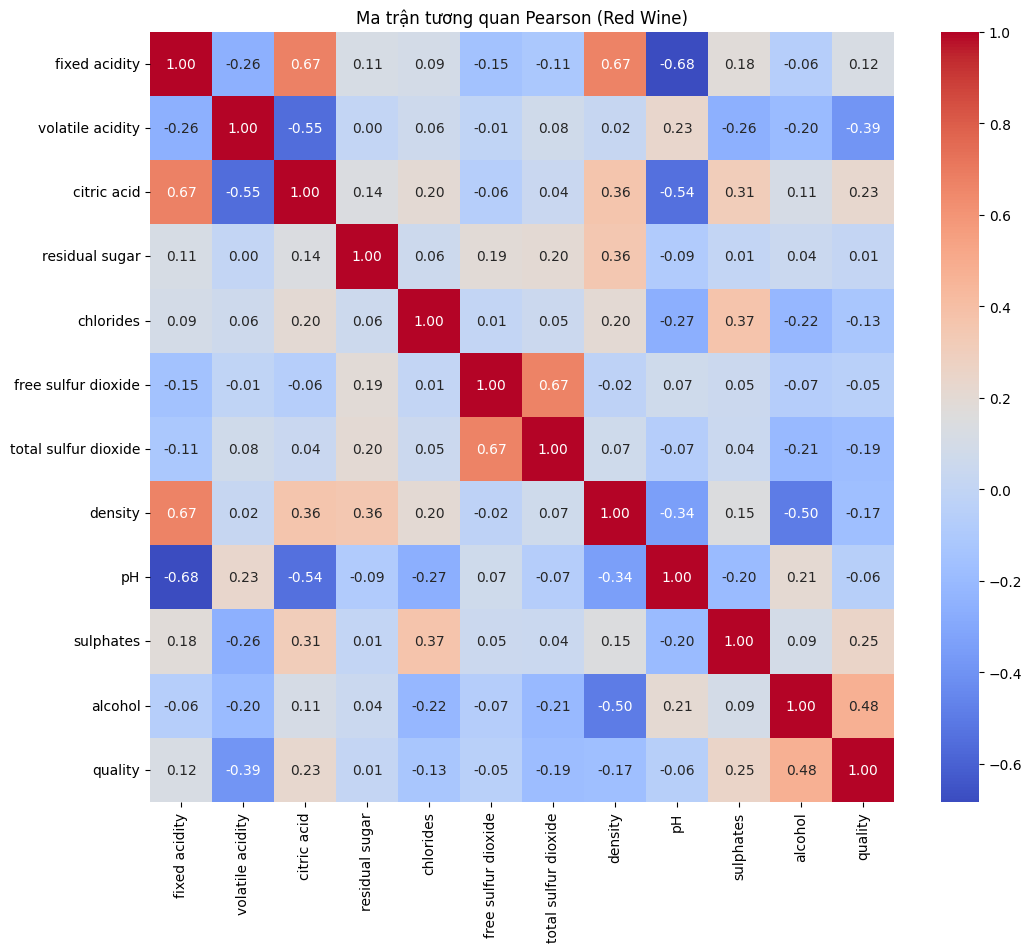

Không có cột nào có độ tương đồng quá cao (> 0.9).
Nguyễn Đức Trung - 6351071072


In [2]:
# câu 4 trang 24 câu 3

# 1. Tính ma trận tương quan
# Dữ liệu Wine toàn là số nên chọn hết
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr(method='pearson')

# 2. Vẽ Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Ma trận tương quan Pearson (Red Wine)")
plt.show()

# 3. Loại bỏ cột tương đồng cao (> 0.9)
# (Lưu ý: Không xóa cột quality vì đó là Target)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9) and column != 'quality']

if to_drop:
    df.drop(to_drop, axis=1, inplace=True)
    print("Đã loại bỏ các cột trùng lặp:", to_drop)
else:
    print("Không có cột nào có độ tương đồng quá cao (> 0.9).")

print("Nguyễn Đức Trung - 6351071072")

In [3]:
# bài 4 trang 26 câu 4

target_col = 'quality'

# Tách X và y
X = df.drop(target_col, axis=1)
y = df[target_col]

print("Đã tách xong X và y.")
print(f"Kích thước X: {X.shape}")
print(f"Kích thước y: {y.shape}")

print("Nguyễn Đức Trung - 6351071072")

Đã tách xong X và y.
Kích thước X: (1599, 11)
Kích thước y: (1599,)
Nguyễn Đức Trung - 6351071072


In [4]:
# bài 4 trang 26 câu 5

# 1. Mã hóa One-Hot cho X
X_encoded = pd.get_dummies(X, drop_first=True)

# 2. Mã hóa Label Encoder cho y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"Kích thước X sau khi xử lý: {X_encoded.shape}")
print(f"Các nhãn lớp (quality): {le.classes_}")

print("Nguyễn Đức Trung - 6351071072")

Kích thước X sau khi xử lý: (1599, 11)
Các nhãn lớp (quality): [3 4 5 6 7 8]
Nguyễn Đức Trung - 6351071072


In [5]:
# bài 4 trang 26 câu 6

# Chia dữ liệu theo tỷ lệ 70% Train - 30% Test như đề bài yêu cầu
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

print("Đã chia dữ liệu thành công:")
print(f"Train set: {X_train.shape}")
print(f"Test set:  {X_test.shape}")

print("Nguyễn Đức Trung - 6351071072")

Đã chia dữ liệu thành công:
Train set: (1119, 11)
Test set:  (480, 11)
Nguyễn Đức Trung - 6351071072


Độ chính xác ID3: 51.88%


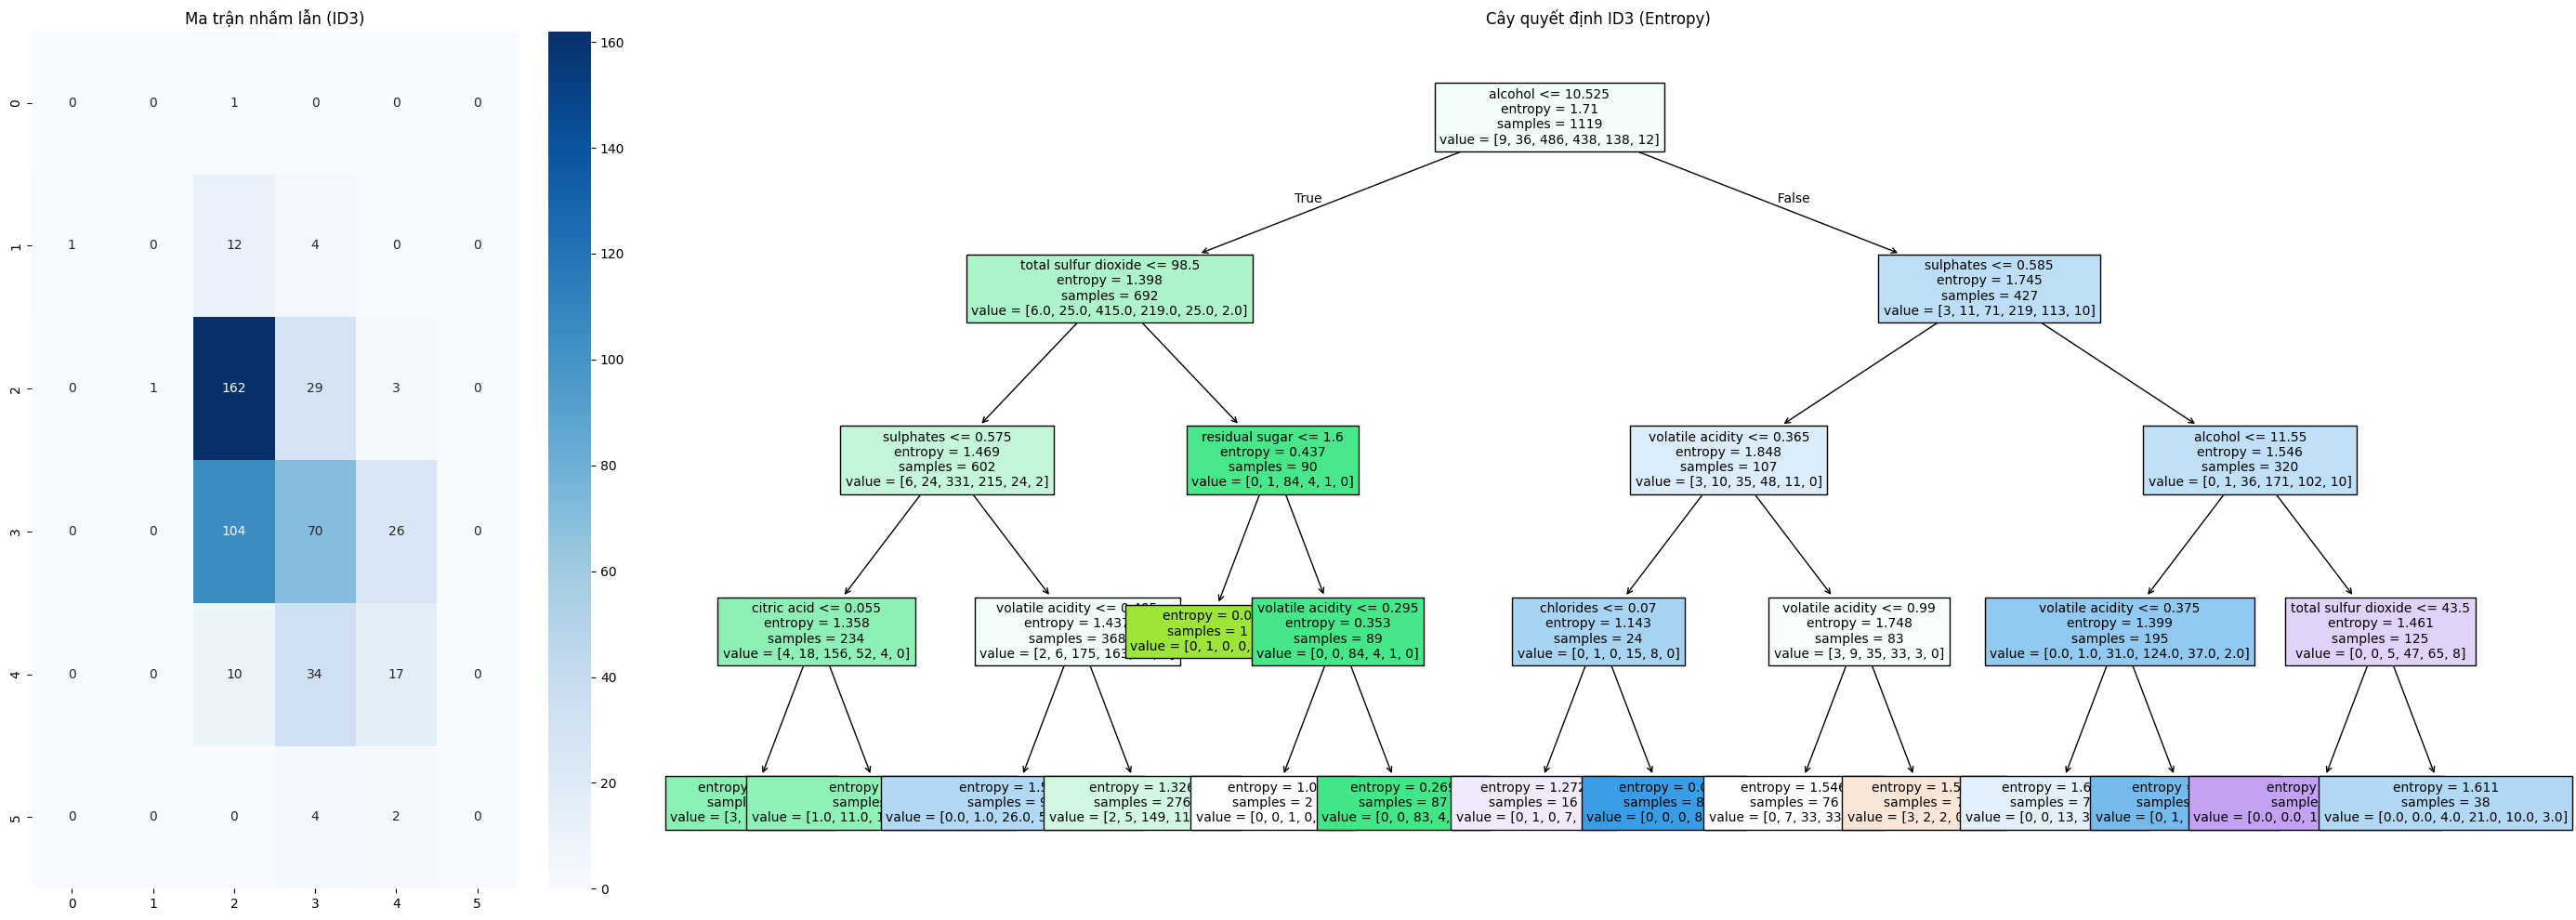

Nguyễn Đức Trung - 6351071072


In [6]:
# bài 4 trang 26 câu 7

# Huấn luyện ID3
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
id3_model.fit(X_train, y_train)

# Dự đoán
y_pred_id3 = id3_model.predict(X_test)
acc_id3 = accuracy_score(y_test, y_pred_id3)
conf_matrix_id3 = confusion_matrix(y_test, y_pred_id3)

print(f"Độ chính xác ID3: {acc_id3 * 100:.2f}%")

# Vẽ hình
fig, ax = plt.subplots(1, 2, figsize=(28, 10), gridspec_kw={'width_ratios': [1, 3]})
sns.heatmap(conf_matrix_id3, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Ma trận nhầm lẫn (ID3)")

plot_tree(id3_model, feature_names=X_encoded.columns, filled=True, fontsize=10, ax=ax[1])
ax[1].set_title("Cây quyết định ID3 (Entropy)")

plt.tight_layout()
plt.savefig('wine_id3.png', dpi=100)
plt.show()

print("Nguyễn Đức Trung - 6351071072")

Độ chính xác CART: 54.79%


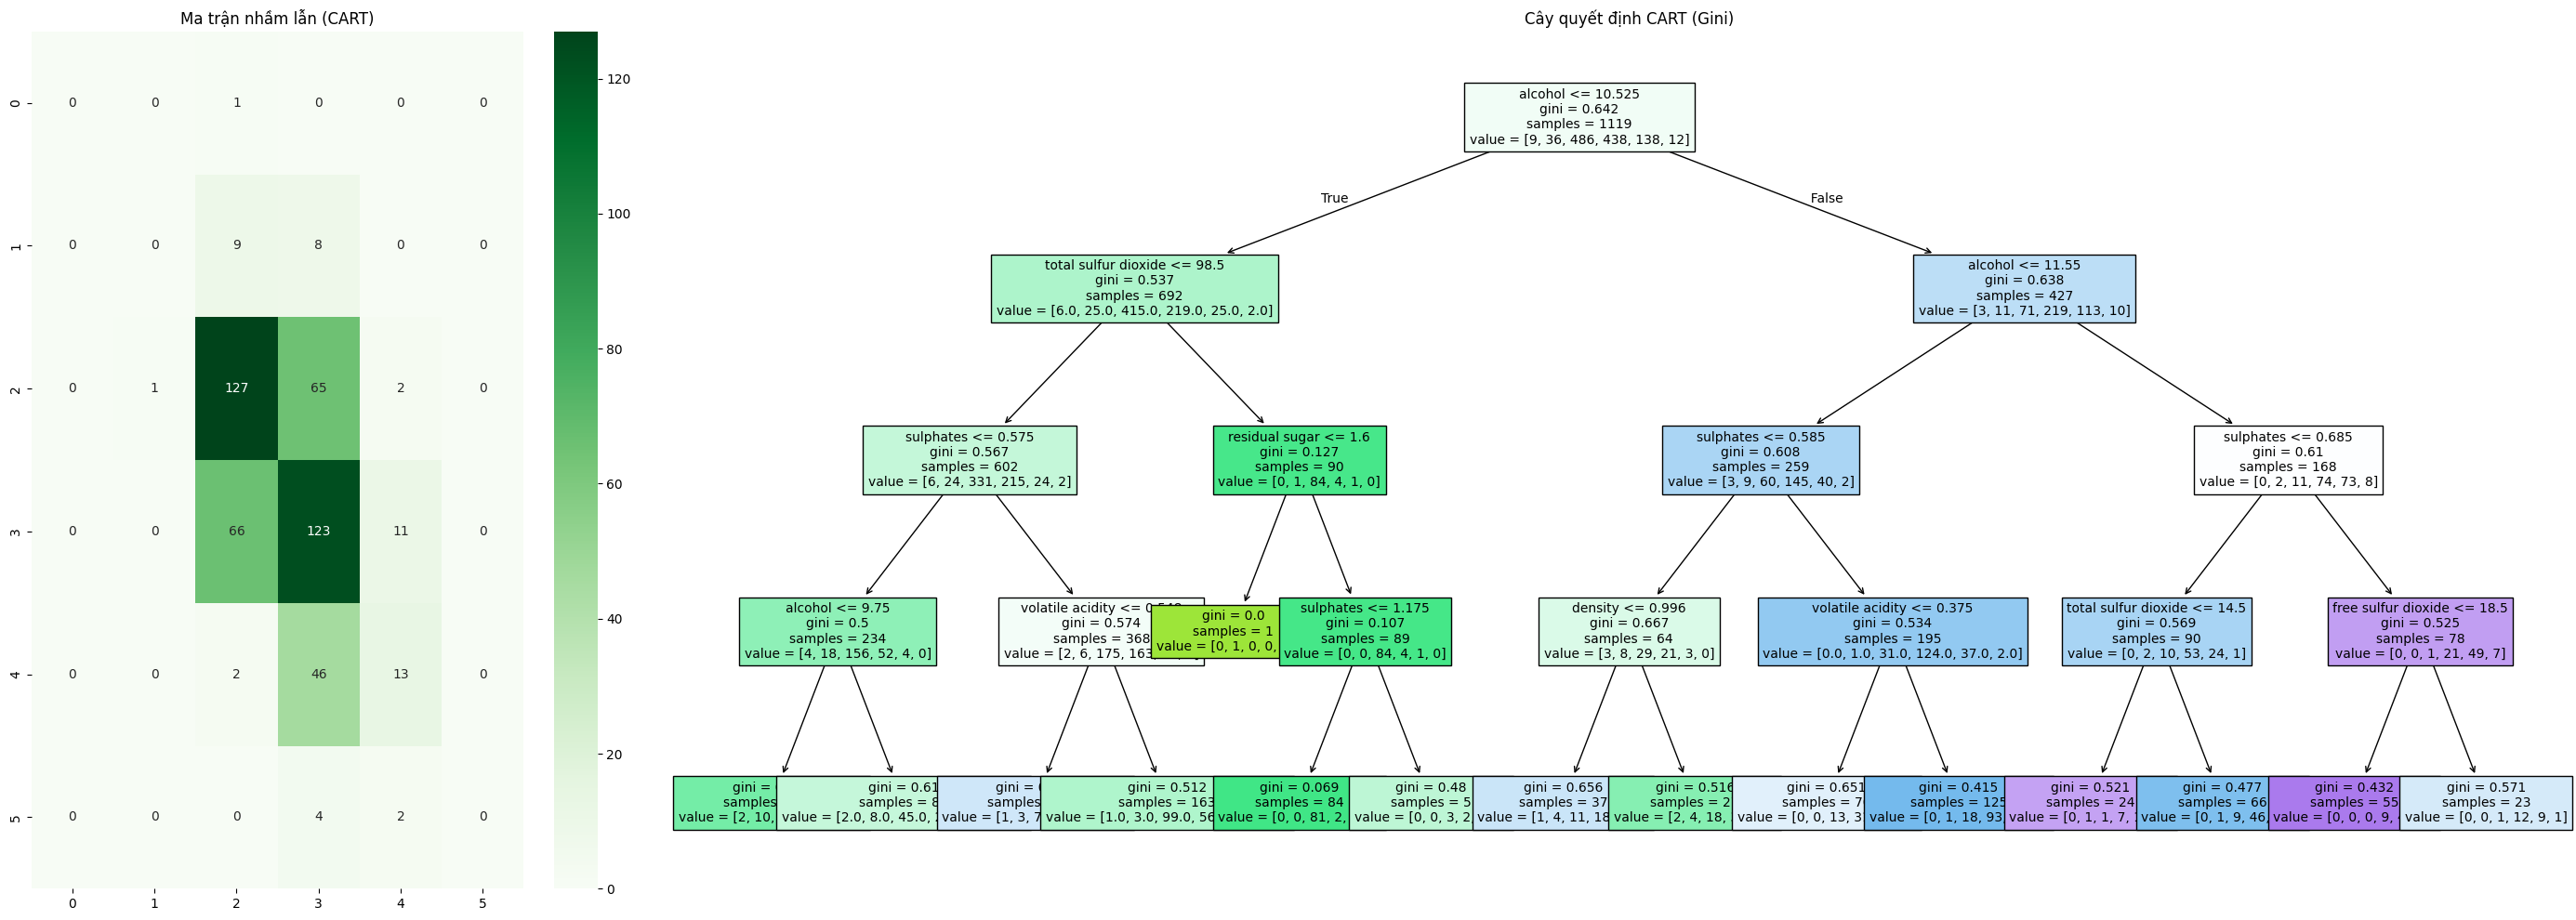

Nguyễn Đức Trung - 6351071072


In [7]:
# bài 4 trang 26 câu 8

# Huấn luyện CART
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=4)
cart_model.fit(X_train, y_train)

# Dự đoán
y_pred_cart = cart_model.predict(X_test)
acc_cart = accuracy_score(y_test, y_pred_cart)
conf_matrix_cart = confusion_matrix(y_test, y_pred_cart)

print(f"Độ chính xác CART: {acc_cart * 100:.2f}%")

# Vẽ hình
fig, ax = plt.subplots(1, 2, figsize=(28, 10), gridspec_kw={'width_ratios': [1, 3]})
sns.heatmap(conf_matrix_cart, annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title("Ma trận nhầm lẫn (CART)")

plot_tree(cart_model, feature_names=X_encoded.columns, filled=True, fontsize=10, ax=ax[1])
ax[1].set_title("Cây quyết định CART (Gini)")

plt.tight_layout()
plt.savefig('wine_cart.png', dpi=100)
plt.show()

print("Nguyễn Đức Trung - 6351071072")

Độ chính xác Naïve Bayes: 54.17%


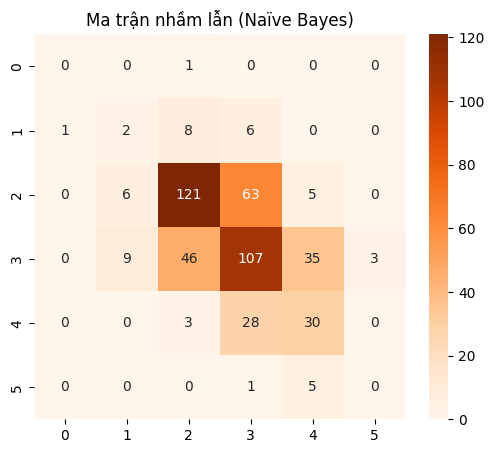

Nguyễn Đức Trung - 6351071072


In [8]:
# bài 4 trang 26 câu 9

# Huấn luyện Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Độ chính xác Naïve Bayes: {acc_nb * 100:.2f}%")

# Vẽ heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Oranges')
plt.title("Ma trận nhầm lẫn (Naïve Bayes)")
plt.show()

print("Nguyễn Đức Trung - 6351071072")

BẢNG SO SÁNH:
           Model  Accuracy
1    CART (Gini)  0.547917
2    Naïve Bayes  0.541667
0  ID3 (Entropy)  0.518750


/tmp/ipython-input-299515174.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


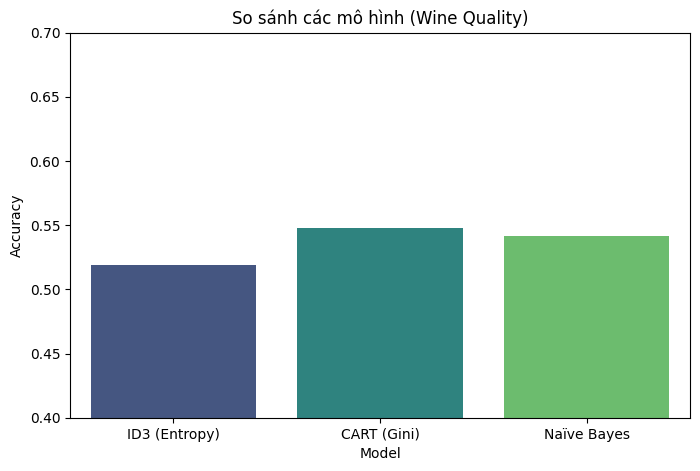

Nguyễn Đức Trung - 6351071072


In [9]:
# bài 4 trang 26 câu 10

results = pd.DataFrame({
    'Model': ['ID3 (Entropy)', 'CART (Gini)', 'Naïve Bayes'],
    'Accuracy': [acc_id3, acc_cart, acc_nb]
})

print("BẢNG SO SÁNH:")
print(results.sort_values(by='Accuracy', ascending=False))

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.ylim(0.4, 0.7)
plt.title("So sánh các mô hình (Wine Quality)")
plt.show()

print("Nguyễn Đức Trung - 6351071072")